In [19]:
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
import numpy as np
import os

In [ ]:
# first taking a look at one sample for inspection
p1_dir = "PBMC_datasets/2/GSE141578_RAW/PBMC8_matrix/"

adata1 = sc.read_10x_mtx(
    p1_dir,
    var_names="gene_symbols",
    cache=True
)
adata1.var_names_make_unique()


In [ ]:
print(adata1)
# no metadata, will have to add

AnnData object with n_obs × n_vars = 992 × 56395
    var: 'gene_ids'


In [22]:
display(adata1.obs.head())
display(adata1.var.head()) 
# dont have the enseble id (gene_ids is the same as the gene symbols)

""
406_CATAGGACTGTGCTCAGAAG-1
406_CTGATACTTCACATCATTGC-1
406_TGTAGCGTAACAGCGAAGTC-1
406_GTAGTACCGGATAACATACG-1
406_GCTGCTCTTCACCTCTCCTG-1


,gene_ids
AL669831.5,AL669831.5
LINC00115,LINC00115
NOC2L,NOC2L
KLHL17,KLHL17
PLEKHN1,PLEKHN1


In [23]:
pd.DataFrame(
    adata1.X[:10, :20].toarray(),
    index=adata1.obs_names[:10],
    columns=adata1.var_names[:20]
)
# already normalised?

,AL669831.5,LINC00115,NOC2L,KLHL17,PLEKHN1,ISG15,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,UBE2J2,SCNN1D,ACAP3,PUSL1,INTS11,CPTP,DVL1,AURKAIP1
406_CATAGGACTGTGCTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.899366,0.000000,0.000000,0.937656,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.919132
406_CTGATACTTCACATCATTGC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_TGTAGCGTAACAGCGAAGTC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.931457,0.0,0.0,0.000000,0.0,0.000000,0.0,0.928501,0.0,0.0,0.927658
406_GTAGTACCGGATAACATACG-1,0.0,0.0,0.0,0.0,0.0,0.915168,0.961162,0.000000,0.000000,0.948881,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_GCTGCTCTTCACCTCTCCTG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.944302,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_CAAGAGGTCACCTTACCACA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.956661,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
406_ACATTCTTATCTCAAGTCGC-1,0.0,0.0,0.0,0.0,0.0,1.914330,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.946151,0.0,0.0,0.000000
406_ACGATGCGAATGGTATTGTC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.944633,0.0,0.0,1.943980
406_TTACGGTTAAACCTCTCCTG-1,0.0,0.0,0.0,0.0,0.0,1.902740,0.000000,0.960706,2.968320,0.000000,0.0,0.0,0.938997,0.0,0.954230,0.0,1.938866,0.0,0.0,0.938145
406_TGCACTGTCTGTGTCACGAG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.954587,0.0,0.000000,0.0,0.0,0.952765


In [24]:
# mitochondrial genes
adata1.var["mt"] = adata1.var_names.str.startswith("MT-") 
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata1

AnnData object with n_obs × n_vars = 992 × 56395
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

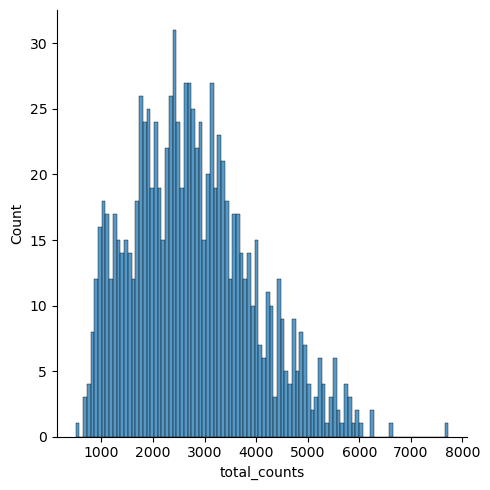

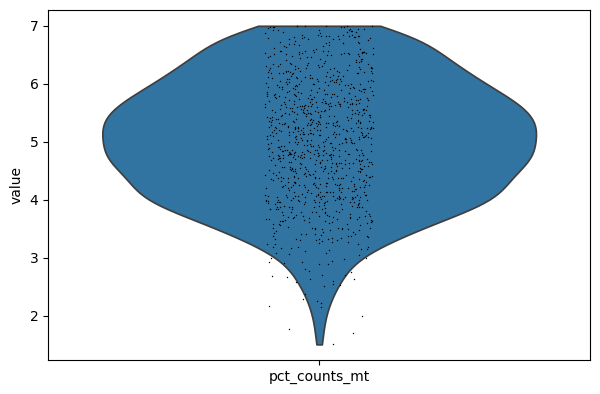

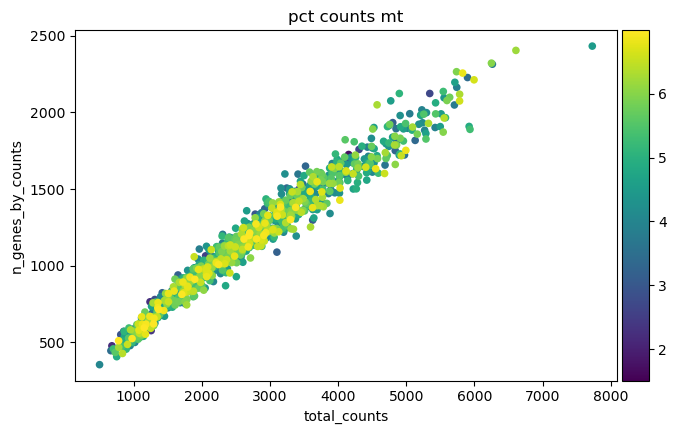

In [25]:
p1 = sns.displot(adata1.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata1, "pct_counts_mt")
p3 = sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [27]:
print(adata1.X.max())
print(adata1.X.min())

590.66724
0.0


In [29]:
print(adata1.n_vars)  # number of genes


56395
